In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer  
from sklearn.model_selection import KFold   
from statistics import mean
import joblib
from ydata_profiling import ProfileReport


# Gain data insight


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         51707 non-null  int64  
 1   city                        51707 non-null  object 
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  float64
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  bool   
 9   biz                         51707 non-null  bool   
 10  cleanliness_rating          51707 non-null  float64
 11  guest_satisfaction_overall  51707 non-null  float64
 12  bedrooms                    51707 non-null  int6

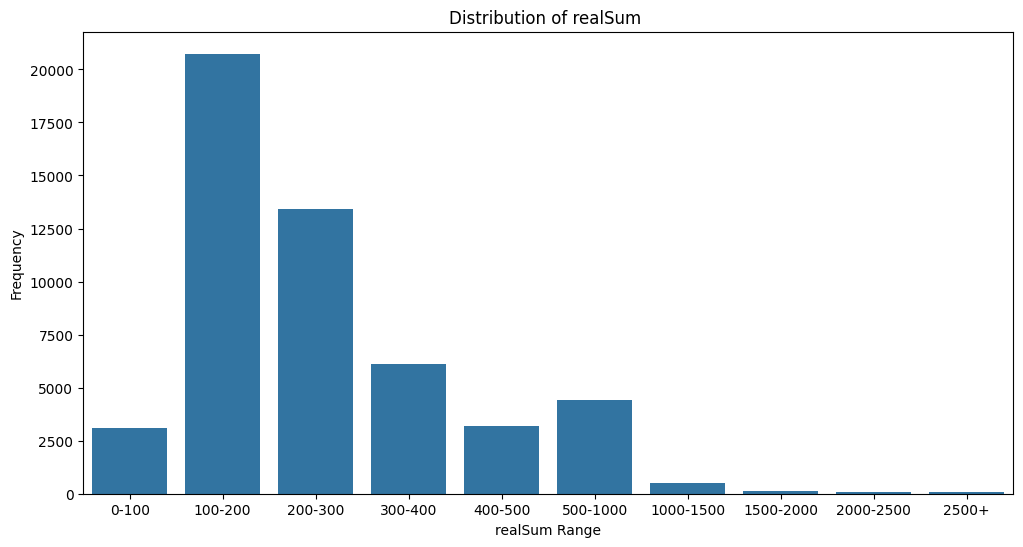

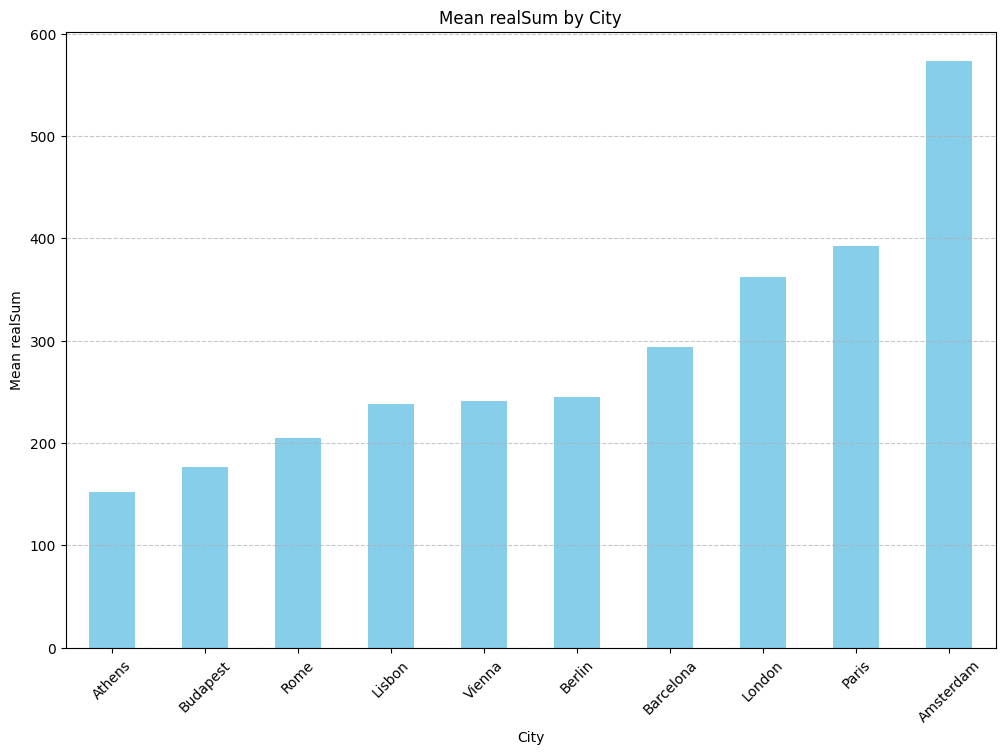

In [54]:
raw_data = pd.read_csv(r'datasets\airbnb.csv')



# In[3]: STEP 3. DISCOVER THE DATA TO GAIN INSIGHTS
#region
# 3.1 Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())              
print('\n____________ Some first data examples ____________')
print(raw_data.head(3)) 
print('\n____________ Counts on a feature ____________')
#print(raw_data['LEGAL DOCUMENTS'].value_counts()) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())    
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,5,48], [2, 5]] ) # Refer using column ID


import seaborn as sns

bins = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, np.inf]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500+']

# Categorize the realSum data according to the bins (only for visualization)
binned_data = pd.cut(raw_data['realSum'], bins=bins, labels=labels, include_lowest=True)

## Plot the distribution of the realSum for Price range
plt.figure(figsize=(12, 6))
sns.countplot(x=binned_data, order=labels)
plt.title('Distribution of realSum ')
plt.xlabel('realSum Range')
plt.ylabel('Frequency')
# Save the plot to a file
plt.savefig('figures/realSum_distribution.png')
plt.show()






## Mean realSum of each city
# Group by 'city' and calculate the mean of 'realSum'
mean_realSum_by_city = raw_data.groupby('city')['realSum'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
mean_realSum_by_city.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Mean realSum')
plt.title('Mean realSum by City')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [56]:
"""


# Import the ProfileReport class from the ydata_profiling package
from ydata_profiling import ProfileReport

# Create a ProfileReport object to generate an exploratory data analysis report
report = ProfileReport(
    raw_data,  # The DataFrame containing the raw data to be analyzed
    title="Airbnb prices in European cities:",  # Title for the report

    # Custom descriptions for variables in the dataset to provide context in the report
    variables={
        "description": {
            "city": "The city where the accommodation offer is located.",  # Description for the 'city' column
            "realSum": "The total price in EUR for accommodating two people for two nights.",  # Description for the 'realSum' column
            "room_type": "The type of accommodation being offered (e.g., entire place, private room, shared room).",  # Description for the 'room_type' column
            "room_shared": "Binary variable indicating if the room is shared (1 for shared, 0 for not).",  # Description for the 'room_shared' column
            "room_private": "Binary variable indicating if the room is private (1 for private, 0 for not).",  # Description for the 'room_private' column
            "person_capacity": "The maximum number of guests that the accommodation can host.",  # Description for the 'person_capacity' column
            "host_is_superhost": "Binary variable indicating if the host is a superhost (1 for superhost, 0 for not).",  # Description for the 'host_is_superhost' column
            "multi": "Binary variable indicating if the listing is managed by a host with 2-4 offers (1 for yes, 0 for no).",  # Description for the 'multi' column
            "biz": "Binary variable indicating if the listing is managed by a host with more than 4 offers (1 for yes, 0 for no).",  # Description for the 'biz' column
            "cleanliness_rating": "Rating of the cleanliness of the accommodation, usually on a scale (e.g., 1 to 10).",  # Description for the 'cleanliness_rating' column
            "guest_satisfaction_overall": "Overall rating given by guests for the listing, typically on a scale (e.g., 1 to 10).",  # Description for the 'guest_satisfaction_overall' column
            "bedrooms": "Number of bedrooms in the accommodation (0 for studios).",  # Description for the 'bedrooms' column
            "dist": "Distance from the city center in kilometers.",  # Description for the 'dist' column
            "metro_dist": "Distance from the nearest metro station in kilometers.",  # Description for the 'metro_dist' column
            "attr_index": "Index indicating the attractiveness of the listing location based on nearby attractions.",  # Description for the 'attr_index' column
            "attr_index_norm": "Normalized attractiveness index (scaled between 0 and 100).",  # Description for the 'attr_index_norm' column
            "rest_index": "Index indicating the restaurant options available near the listing location.",  # Description for the 'rest_index' column
            "rest_index_norm": "Normalized restaurant index (scaled between 0 and 100).",  # Description for the 'rest_index_norm' column
            "lng": "Longitude coordinate of the listing location.",  # Description for the 'lng' column
            "lat": "Latitude coordinate of the listing location."  # Description for the 'lat' column
        }
    }
)

# Display the report in a notebook if possible
report.to_notebook_iframe()
"""



'\n\n\n# Import the ProfileReport class from the ydata_profiling package\nfrom ydata_profiling import ProfileReport\n\n# Create a ProfileReport object to generate an exploratory data analysis report\nreport = ProfileReport(\n    raw_data,  # The DataFrame containing the raw data to be analyzed\n    title="Airbnb prices in European cities:",  # Title for the report\n\n    # Custom descriptions for variables in the dataset to provide context in the report\n    variables={\n        "description": {\n            "city": "The city where the accommodation offer is located.",  # Description for the \'city\' column\n            "realSum": "The total price in EUR for accommodating two people for two nights.",  # Description for the \'realSum\' column\n            "room_type": "The type of accommodation being offered (e.g., entire place, private room, shared room).",  # Description for the \'room_type\' column\n            "room_shared": "Binary variable indicating if the room is shared (1 for s

# Correlation

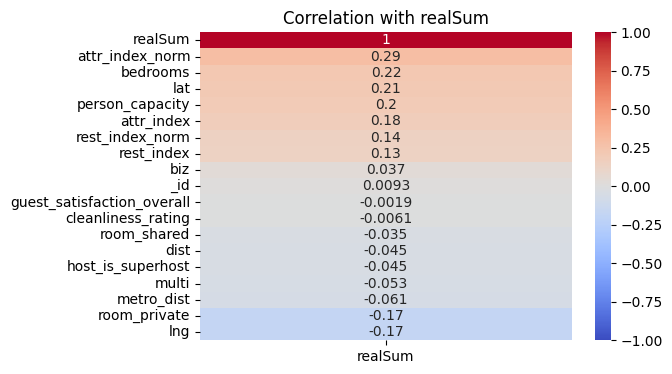

In [41]:
corr_matrix = raw_data.corr(numeric_only=True)

# Extract the correlation of 'realSum' with other variables
corr_realSum = corr_matrix[['realSum']]

# Sort the correlations in descending order
sorted_columns = corr_realSum.sort_values(by='realSum', ascending=False).index
sorted_corr_realSum = corr_realSum.loc[sorted_columns]

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(sorted_corr_realSum, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation with realSum')
plt.show()

# Prepare data

## Remove outlier

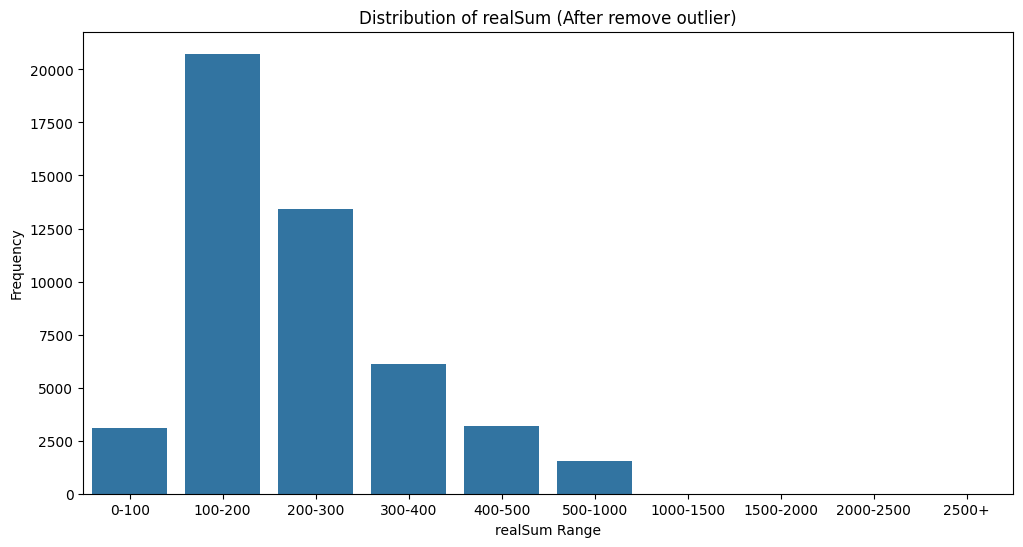

In [58]:
# Drop unnecessary columns
raw_data.drop(columns=["attr_index", "rest_index", "_id"], inplace=True)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = raw_data["realSum"].quantile(0.25)
Q3 = raw_data["realSum"].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bound to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers from the training set
raw_data = raw_data[(raw_data["realSum"] >= lower_bound) & (raw_data["realSum"] <= upper_bound)]


binned_data = pd.cut(raw_data['realSum'], bins=bins, labels=labels, include_lowest=True)

# Plot the distribution of the binned realSum
plt.figure(figsize=(12, 6))
sns.countplot(x=binned_data, order=labels)
plt.title('Distribution of realSum (After remove outlier)')
plt.xlabel('realSum Range')
plt.ylabel('Frequency')

# Save the plot to a file
plt.savefig('figures/realSum_distribution_after.png')


## Split data

In [59]:

from sklearn.model_selection import StratifiedShuffleSplit



method = 2
if method == 1: # Method 1: Randomly select 20% of data for test set. Used when data set is large
    from sklearn.model_selection import train_test_split
    train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)
else:  #Stratified split
# Define bins and labels for stratification
    bins = [0, 100, 200, 300, 400, 500, np.inf]
    labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500+']

# Create the 'PRICE RANGE' column for stratification
    raw_data["PRICE RANGE"] = pd.cut(raw_data["realSum"], bins=bins, labels=labels, include_lowest=True)

# Perform stratified split based on 'PRICE RANGE'
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    for train_index, test_index in splitter.split(raw_data, raw_data["PRICE RANGE"]):
        train_set = raw_data.iloc[train_index].copy()
        test_set = raw_data.iloc[test_index].copy()
    
# Drop the 'PRICE RANGE' column after stratified split
    
    train_set.drop(columns="PRICE RANGE", inplace=True)
    test_set.drop(columns="PRICE RANGE", inplace=True)
    












## Data after split

In [60]:
train_set_labels = train_set["realSum"].copy()
train_set = train_set.drop(columns="realSum")


test_set_labels = test_set["realSum"].copy()
test_set = test_set.drop(columns="realSum")

print('\n____________ Split training and test set ____________')     
print(len(train_set), "training +", len(test_set), "test examples")
print(train_set.head(4))



____________ Split training and test set ____________
38436 training + 9609 test examples
           city        room_type  room_shared  room_private  person_capacity  \
35583    Lisbon     Private room        False          True              2.0   
36123    Lisbon  Entire home/apt        False         False              4.0   
10881    Lisbon     Private room        False          True              4.0   
7177   Budapest     Private room        False          True              2.0   

       host_is_superhost  multi    biz  cleanliness_rating  \
35583              False   True  False                 9.0   
36123              False  False   True                10.0   
10881              False  False   True                10.0   
7177               False  False  False                 9.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  \
35583                        93.0         1  1.747236    0.952981   
36123                        96.0         1  1.159233    0.

# Define pipeline

## Column selector

In [48]:
#%% 4.4 Define pipelines for processing data. 
# INFO: Pipeline is a sequence of transformers (see Geron 2019, page 73). For step-by-step manipulation, see Details_toPipeline.py 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# 4.4.1 Define ColumnSelector: a transformer for choosing columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values   

## Categories

In [47]:
       


cat_feat_names = list(train_set.select_dtypes(exclude=[np.number, bool]).columns)  #Categories column

# Combine numerical and boolean features into num_feat_names

print("Categorical features:", cat_feat_names)




# Define category pipelines
cat_pipeline = Pipeline([
    ('selector', ColumnSelector(cat_feat_names)), # Select categorical features
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="NO INFO", copy=True)),  # Handle missing values
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # One-hot encode categorical features
])   

Categorical features: ['city', 'room_type', 'day_type']


## Numerical


  

In [46]:

num_feat_names = list(train_set.select_dtypes(include=[np.number]).columns) #Numerical column

print("Numerical features:", num_feat_names)

# Define numerical pipelines
num_pipeline = Pipeline([
    ('selector', ColumnSelector(num_feat_names)), #select numerical feature
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)), #Handle missing value
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True)) #Scale feature
])








Numerical features: ['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'lng', 'lat']


## Boolean

In [44]:
from sklearn.preprocessing import FunctionTransformer
bool_feat_names = list(train_set.select_dtypes(include=[bool]).columns)   #Boolean column
print("Boolean features:", bool_feat_names)
def boolean_to_binary(X):
    return X.astype(int)
# Define boolean pipelines
bool_pipeline = Pipeline([
    ('selector', ColumnSelector(bool_feat_names)),  # Select boolean features
    ('to_binary', FunctionTransformer(boolean_to_binary, validate=False)),  # Convert boolean to binary

    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
  
])

Boolean features: ['room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']


## Complete Pipeline

In [45]:
from sklearn.compose import ColumnTransformer
# Combine the pipelines
full_pipeline = ColumnTransformer([ #Combined pipeline
    ("num_pipeline", num_pipeline, num_feat_names),
    ("cat_pipeline", cat_pipeline, cat_feat_names),
    ("bool_pipeline", bool_pipeline, bool_feat_names)
])


processed_train_set_val = full_pipeline.fit_transform(train_set)
joblib.dump(full_pipeline, r'models/full_pipeline.pkl')

# Collect feature names
num_feature_names = num_feat_names
cat_feature_names = full_pipeline.named_transformers_['cat_pipeline'].named_steps['cat_encoder'].get_feature_names_out(cat_feat_names)
bool_feature_names = bool_feat_names  

# Combine all feature names
all_feature_names = list(num_feature_names) + list(cat_feature_names) + list(bool_feature_names)

# Convert to DataFrame
transformed_df = pd.DataFrame(processed_train_set_val, columns=all_feature_names)

# View the info and the  first few rows
print('\n____________ Processed feature values ____________')
print(transformed_df.info())
print(transformed_df.head())

print("Shape of the processed data:", transformed_df.shape)



____________ Processed feature values ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38436 entries, 0 to 38435
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_capacity             38436 non-null  float64
 1   cleanliness_rating          38436 non-null  float64
 2   guest_satisfaction_overall  38436 non-null  float64
 3   bedrooms                    38436 non-null  float64
 4   dist                        38436 non-null  float64
 5   metro_dist                  38436 non-null  float64
 6   attr_index_norm             38436 non-null  float64
 7   rest_index_norm             38436 non-null  float64
 8   lng                         38436 non-null  float64
 9   lat                         38436 non-null  float64
 10  city_Amsterdam              38436 non-null  float64
 11  city_Athens                 38436 non-null  float64
 12  city_Barcelona              38436 no

# Train model

## Store model

In [42]:

def store_model(model, model_name = ""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "": 
        model_name = type(model).__name__
    joblib.dump(model,'models/' + model_name + '_model.pkl')
def load_model(model_name):
    # Load objects into memory
    
    model = joblib.load('models/' + model_name + '_model.pkl')
   
    return model

## R2 Score and RMSE

In [50]:
# 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse   

## Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ LinearRegression ____________')
print('Learned parameters: ', model.coef_, model.intercept_)

# Compute R2 score and root mean squared error
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
        
#  Predict labels for some training instances
print("\nInput data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))
store_model(model)





____________ LinearRegression ____________
Learned parameters:  [ 2.32372676e+01  7.36902336e+00 -3.99122502e-01  1.41754226e+01
 -4.95450543e+00 -3.03488979e-01  2.06507911e+01  1.06224102e+01
 -1.80859477e+03  4.71312493e+02 -1.17322759e+12 -1.17322758e+12
 -1.17322759e+12 -1.17322759e+12 -1.17322759e+12 -1.17322759e+12
 -1.17322759e+12 -1.17322759e+12 -1.17322759e+12 -1.17322759e+12
 -1.77098776e+14 -8.54636332e+13 -8.71353786e+13 -6.91382249e+14
 -6.91382249e+14 -8.99633970e+13 -9.16351424e+13  1.90207725e+00
  1.08200394e+01  2.36345097e+01] 869654252330457.5

R2 score (on training data, best=1): 0.575208550364859
Root Mean Square Error:  73.0

Input data: 
            city        room_type  room_shared  room_private  person_capacity  \
35583    Lisbon     Private room        False          True              2.0   
36123    Lisbon  Entire home/apt        False         False              4.0   
10881    Lisbon     Private room        False          True              4.0   
7177   

## Polinominal Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat_adder = PolynomialFeatures(degree = 2) # add high-degree features to the data
train_set_poly_added = poly_feat_adder.fit_transform(processed_train_set_val)
new_training = 10

model = LinearRegression()
model.fit(train_set_poly_added, train_set_labels)
    

#  Compute R2 score and root mean squared error
print('\n____________ Polinomial regression ____________')
r2score, rmse = r2score_and_rmse(model, train_set_poly_added, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# Predict labels for some training instances
print("\nPredictions: ", model.predict(train_set_poly_added[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))

store_model(model)


____________ Polinomial regression ____________

R2 score (on training data, best=1): 0.6637650321656907
Root Mean Square Error:  65.0

Predictions:  [130.6 286.3 201.1 124.8 141.1 245.1 219.9 139.6 159.1]
Labels:       [175.65666041275796, 269.6998123827392, 310.0375234521576, 98.4631292005452, 90.31256614689904, 170.60675847158905, 268.33087908748803, 110.13990110842924, 139.30766893392237]


## Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100) # n_estimators: no. of trees
model.fit(processed_train_set_val, train_set_labels)


# Compute R2 score and root mean squared error
print('\n____________ RandomForestRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
   
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))

store_model(model)


____________ RandomForestRegressor ____________

R2 score (on training data, best=1): 0.9731858905922156
Root Mean Square Error:  18.4

Predictions:  [174.6 264.6 299.2 101.9 107.8 195.3 248.  112.6 139.5]
Labels:       [175.65666041275796, 269.6998123827392, 310.0375234521576, 98.4631292005452, 90.31256614689904, 170.60675847158905, 268.33087908748803, 110.13990110842924, 139.30766893392237]


## Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the model
model = GradientBoostingRegressor(n_estimators=100)  # You can adjust n_estimators and other hyperparameters
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ GradientBoostingRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))

# Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))

# Store the model
store_model(model)


____________ GradientBoostingRegressor ____________

R2 score (on training data, best=1): 0.6616514395075984
Root Mean Square Error:  65.2

Predictions:  [134.8 267.8 238.6 190.3 160.3 243.7 211.2 128.3 155.3]
Labels:       [175.65666041275796, 269.6998123827392, 310.0375234521576, 98.4631292005452, 90.31256614689904, 170.60675847158905, 268.33087908748803, 110.13990110842924, 139.30766893392237]


## ExtraTrees Regressor

In [38]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize and fit the model
model = ExtraTreesRegressor(n_estimators=100)  # # n_estimators: no. of trees
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ ExtraTreesRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))

# Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))

# Store the model
store_model(model)



____________ ExtraTreesRegressor ____________

R2 score (on training data, best=1): 0.9999999962590309
Root Mean Square Error:  0.0

Predictions:  [175.7 269.7 310.   98.5  90.3 170.6 268.3 110.1 139.3]
Labels:       [175.65666041275796, 269.6998123827392, 310.0375234521576, 98.4631292005452, 90.31256614689904, 170.60675847158905, 268.33087908748803, 110.13990110842924, 139.30766893392237]


## K-Nearest Neighbors Regression

In [37]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors and other hyperparameters
model.fit(processed_train_set_val, train_set_labels)

# Compute R2 score and root mean squared error
print('\n____________ KNeighborsRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))

# Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]))
print("Labels:      ", list(train_set_labels[0:9]))

# Store the model
store_model(model, 'KNeighborsRegressor')




____________ KNeighborsRegressor ____________

R2 score (on training data, best=1): 0.7527500495878344
Root Mean Square Error:  55.7

Predictions:  [130.58161351 279.08067542 257.78611632  87.79433191 152.87283332
 239.50744936 225.32314237 143.83802404 104.15351892]
Labels:       [175.65666041275796, 269.6998123827392, 310.0375234521576, 98.4631292005452, 90.31256614689904, 170.60675847158905, 268.33087908748803, 110.13990110842924, 139.30766893392237]


## Evaluate with K-Fold cross validation

In [36]:
from sklearn.model_selection import cross_val_score, KFold
import joblib
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

def evaluate_model(model, model_name, feature, label, cv):
    # Perform K-fold cross-validation on the model, using negative mean squared error (NMSE) as the scoring metric
    nmse_scores = cross_val_score(model, feature, label, cv=cv, scoring='neg_mean_squared_error')
    
    # Convert NMSE to RMSE (Root Mean Squared Error) by taking the square root of the negative scores
    rmse_scores = np.sqrt(-nmse_scores)
    
    # Save the RMSE scores for future reference
    joblib.dump(rmse_scores, f'saved_objects/{model_name}_rmse.pkl')
    
    
    print(f"{model_name} RMSE: ", rmse_scores.round(decimals=1))
    
   
    print("Avg. RMSE: ", np.mean(rmse_scores).round(decimals=1), '\n')

# Define a dictionary of models to evaluate, with each key being the model name and the value being the model object
models = {
    "LinearRegression": LinearRegression(),  #
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100),  
    "PolynomialRegression": Pipeline([  
        ('poly_feat_adder', PolynomialFeatures(degree=2)),  
        ('lin_reg', LinearRegression())
    ]),
    "GradientBoostingRegressor": GradientBoostingRegressor(), 
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5), 
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100)  
}

# Set up K-Fold cross-validation with 5 splits, shuffling the data before splitting
cv = KFold(n_splits=5, shuffle=True, random_state=37)

print('\n____________ K-fold cross-validation ____________')

# Flag to indicate whether to run new evaluations or load existing results
run_new_evaluation = 1

if run_new_evaluation:
    # If running new evaluations, iterate through each model in the dictionary
    for model_name, model in models.items():
        feature = processed_train_set_val  # The features to use in the model
        evaluate_model(model, model_name, feature, train_set_labels, cv)  # Evaluate each model using the helper function
else:
    # If not running new evaluations, load the saved RMSE scores and print them
    for model_name in models.keys():
        try:
            # Try to load the saved RMSE scores for the model
            rmse_scores = joblib.load(f'saved_objects/{model_name}_rmse.pkl')
            print(f"{model_name} RMSE: ", rmse_scores.round(decimals=1))
            print("Avg. RMSE: ", np.mean(rmse_scores).round(decimals=1), '\n')
        except FileNotFoundError:
            # If no saved RMSE scores are found, print a message indicating this
            print(f"No saved RMSE scores found for {model_name}.")



____________ K-fold cross-validation ____________
LinearRegression RMSE:  [72.9 72.8 72.8 75.2 71.7]
Avg. RMSE:  73.1 

RandomForestRegressor RMSE:  [53.1 52.1 52.9 54.1 52.3]
Avg. RMSE:  52.9 

PolynomialRegression RMSE:  [65.  65.5 66.  67.5 64.2]
Avg. RMSE:  65.7 

GradientBoostingRegressor RMSE:  [65.6 65.9 66.4 68.3 64.6]
Avg. RMSE:  66.2 

KNeighborsRegressor RMSE:  [68.8 69.3 69.5 70.6 68.5]
Avg. RMSE:  69.3 

ExtraTreesRegressor RMSE:  [52.  51.6 52.7 52.8 51.5]
Avg. RMSE:  52.1 



# FINE-TUNE MODEL

In [27]:
import joblib
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from scipy.stats import randint, uniform

def print_search_result(grid_search, model_name=""):
    print("\n====== Fine-tune " + model_name + " ======")
    print('Best hyperparameter combination: ', grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params)

method = 2  # Change this value to 1 for GridSearchCV, or 2 for RandomizedSearchCV

# Define KFold Cross Validator
cv = KFold(n_splits=5, shuffle=True, random_state=37)

# 6.1 Method 1: Grid search
if method == 1:
    run_new_search = True  # Set this to False if you want to load previous results
    if run_new_search:
        # Define the grid of hyperparameters to search over
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_features': ['sqrt', 'log2', None, 0.5, 0.8],
            'max_depth': [10, 20, 50, 100],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False],
        }

        # Initialize the ExtraTreesRegressor
        model = ExtraTreesRegressor(random_state=42)

        # Set up GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', 
                                   return_train_score=True, n_jobs=-1, refit=True)

        # Fit the model
        grid_search.fit(processed_train_set_val, train_set_labels)

        # Save the search results
        joblib.dump(grid_search, 'saved_objects/ExtraTreesRegressor_gridsearch.pkl')

        # Print the search results
        print_search_result(grid_search, model_name="ExtraTreesRegressor")
    else:
        # Load grid_search
        grid_search = joblib.load('saved_objects/ExtraTreesRegressor_gridsearch.pkl')
        print_search_result(grid_search, model_name="ExtraTreesRegressor")

# 6.2 Method 2: Random search
elif method == 2:
    run_new_search = False  # Set this to False if you want to load previous results
    if run_new_search:
        # Define the parameter grid to search over
        param_distributions = {
            'n_estimators': randint(50, 300),
            'max_features': ['sqrt', 'log2', None] + list(uniform(0.1, 0.9).rvs(size=5)),
            'max_depth': randint(5, 100),
            'min_samples_split': randint(2, 10),
            'min_samples_leaf': randint(1, 10),
            'bootstrap': [True, False],
        }

        # Initialize the ExtraTreesRegressor
        model = ExtraTreesRegressor(random_state=42)

        # Set up RandomizedSearchCV
        random_search = RandomizedSearchCV(model, param_distributions, n_iter=100, cv=cv, 
                                           scoring='neg_mean_squared_error', return_train_score=True, 
                                           random_state=42, n_jobs=-1, refit=True)

        # Fit the model
        random_search.fit(processed_train_set_val, train_set_labels)

        # Save the search results
        joblib.dump(random_search, 'saved_objects/ExtraTreesRegressor_randomsearch.pkl')

        # Print the search results
        print_search_result(random_search, model_name="ExtraTreesRegressor")
    else:
        # Load random_search
        random_search = joblib.load('saved_objects/ExtraTreesRegressor_randomsearch.pkl')
        print_search_result(random_search, model_name="ExtraTreesRegressor")



====== Fine-tune ExtraTreesRegressor ======
Best hyperparameter combination:  {'bootstrap': False, 'max_depth': 45, 'max_features': 0.8370538541290593, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Best rmse:  52.276937640786215
Performance of hyperparameter combinations:
rmse = 62.6 {'bootstrap': True, 'max_depth': 56, 'max_features': 0.8370538541290593, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 70}
rmse = 72.2 {'bootstrap': True, 'max_depth': 87, 'max_features': 0.11555641142554783, 'min_samples_leaf': 8, 'min_samples_split': 6, 'n_estimators': 149}
rmse = 59.6 {'bootstrap': False, 'max_depth': 28, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 51}
rmse = 57.0 {'bootstrap': False, 'max_depth': 34, 'max_features': 0.68681030237892, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 237}
rmse = 61.7 {'bootstrap': True, 'max_depth': 37, 'max_features': 0.8097547418449291, 'min_samples_leaf': 6,

# Test Result

Solution:  ExtraTreesRegressor(max_depth=45, max_features=0.8370538541290593,
                    n_estimators=120, random_state=42)


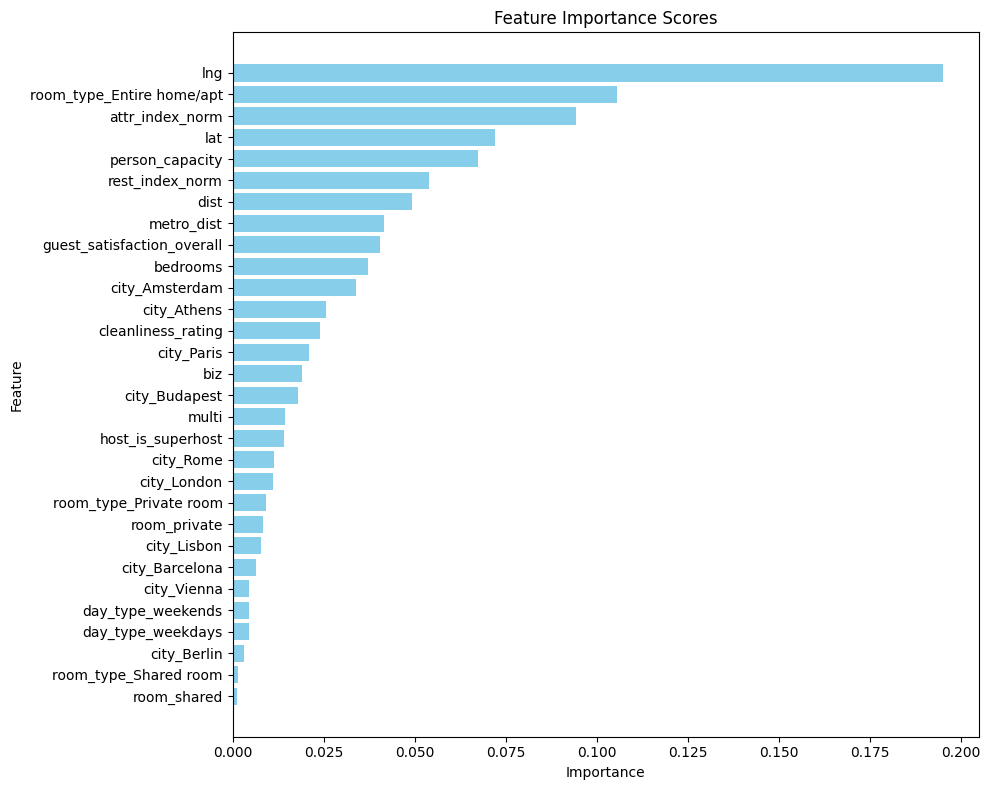


Performance on test data:
R2 score (on test data, best=1): 0.8206481388705081
Root Mean Square Error:  47.4

Test data: 
             city        room_type  room_shared  room_private  person_capacity  \
31835   Budapest  Entire home/apt        False         False              2.0   
14705     London     Private room        False          True              2.0   
22795       Rome     Private room        False          True              2.0   
27607     Athens  Entire home/apt        False         False              5.0   
43445      Paris     Private room        False          True              2.0   
13406     London     Private room        False          True              2.0   
49529       Rome  Entire home/apt        False         False              4.0   
4283   Barcelona     Private room        False          True              2.0   
49583       Rome     Private room        False          True              2.0   

       host_is_superhost  multi    biz  cleanliness_rating  \
3183

In [35]:
""" Just for testing , not complete code """
#%%  Run on test data
search = joblib.load('saved_objects/ExtraTreesRegressor_randomsearch.pkl')
best_model = search.best_estimator_
print('Solution: ', best_model)
#best_model.fit(processed_train_set_val, train_set_labels)
full_pipeline = joblib.load(r'models/full_pipeline.pkl')




#Feature Importance
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))  # Set the figure size
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.tight_layout()
# Show the plot
plt.show()




processed_test_set = full_pipeline.transform(test_set)  
# Compute R2 score and root mean squared error
r2score, rmse = r2score_and_rmse(best_model, processed_test_set, test_set_labels)
print('\nPerformance on test data:')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
#  Predict labels for some test instances
print("\nTest data: \n", test_set.iloc[0:9])
print("\nPredictions: ", best_model.predict(processed_test_set[0:9]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:9]),'\n')
